In [ ]:
!git clone https://github.com/WongKinYiu/yolov9.git

Cloning into 'yolov9'...
remote: Enumerating objects: 781, done.
remote: Counting objects: 100% (407/407), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 781 (delta 280), reused 277 (delta 228), pack-reused 374
Receiving objects: 100% (781/781), 3.30 MiB | 27.02 MiB/s, done.
Resolving deltas: 100% (325/325), done.


In [ ]:
!pip install -r yolov9/requirements.txt -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 36.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 88.8 MB/s eta 0:00:00


In [ ]:
cd yolov9

/content/yolov9


In [ ]:
import os

HOME = os.getcwd()
print(HOME)

/content/yolov9


In [ ]:
!mkdir -p {HOME}/weights

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8joVH7TL2k5V6uScFBEy")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(2)
dataset = version.download("yolov9")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-2 in yolov9:: 100%|██████████| 6472/6472 [00:00<00:00, 6703.42it/s]


In [ ]:
!python train_dual.py --workers 8 --device 0 --batch 8 --data 'PPE_Detection-2/data.yaml' \
--img 640 --cfg models/detect/yolov9-e.yaml --weights '{HOME}/weights/yolov9-e.pt' --name yolov9-e-finetuning \
--hyp hyp.scratch-high.yaml --min-items 0 --epochs 10 --close-mosaic 15

2024-07-26 05:50:04.810766: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-26 05:50:04.861274: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-26 05:50:04.861328: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-26 05:50:04.862929: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-26 05:50:04.870654: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
!ls {HOME}/runs/train/yolov9-e-finetuning

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1721973007.3df01e80af26.1020.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


In [ ]:
from IPython.display import Image

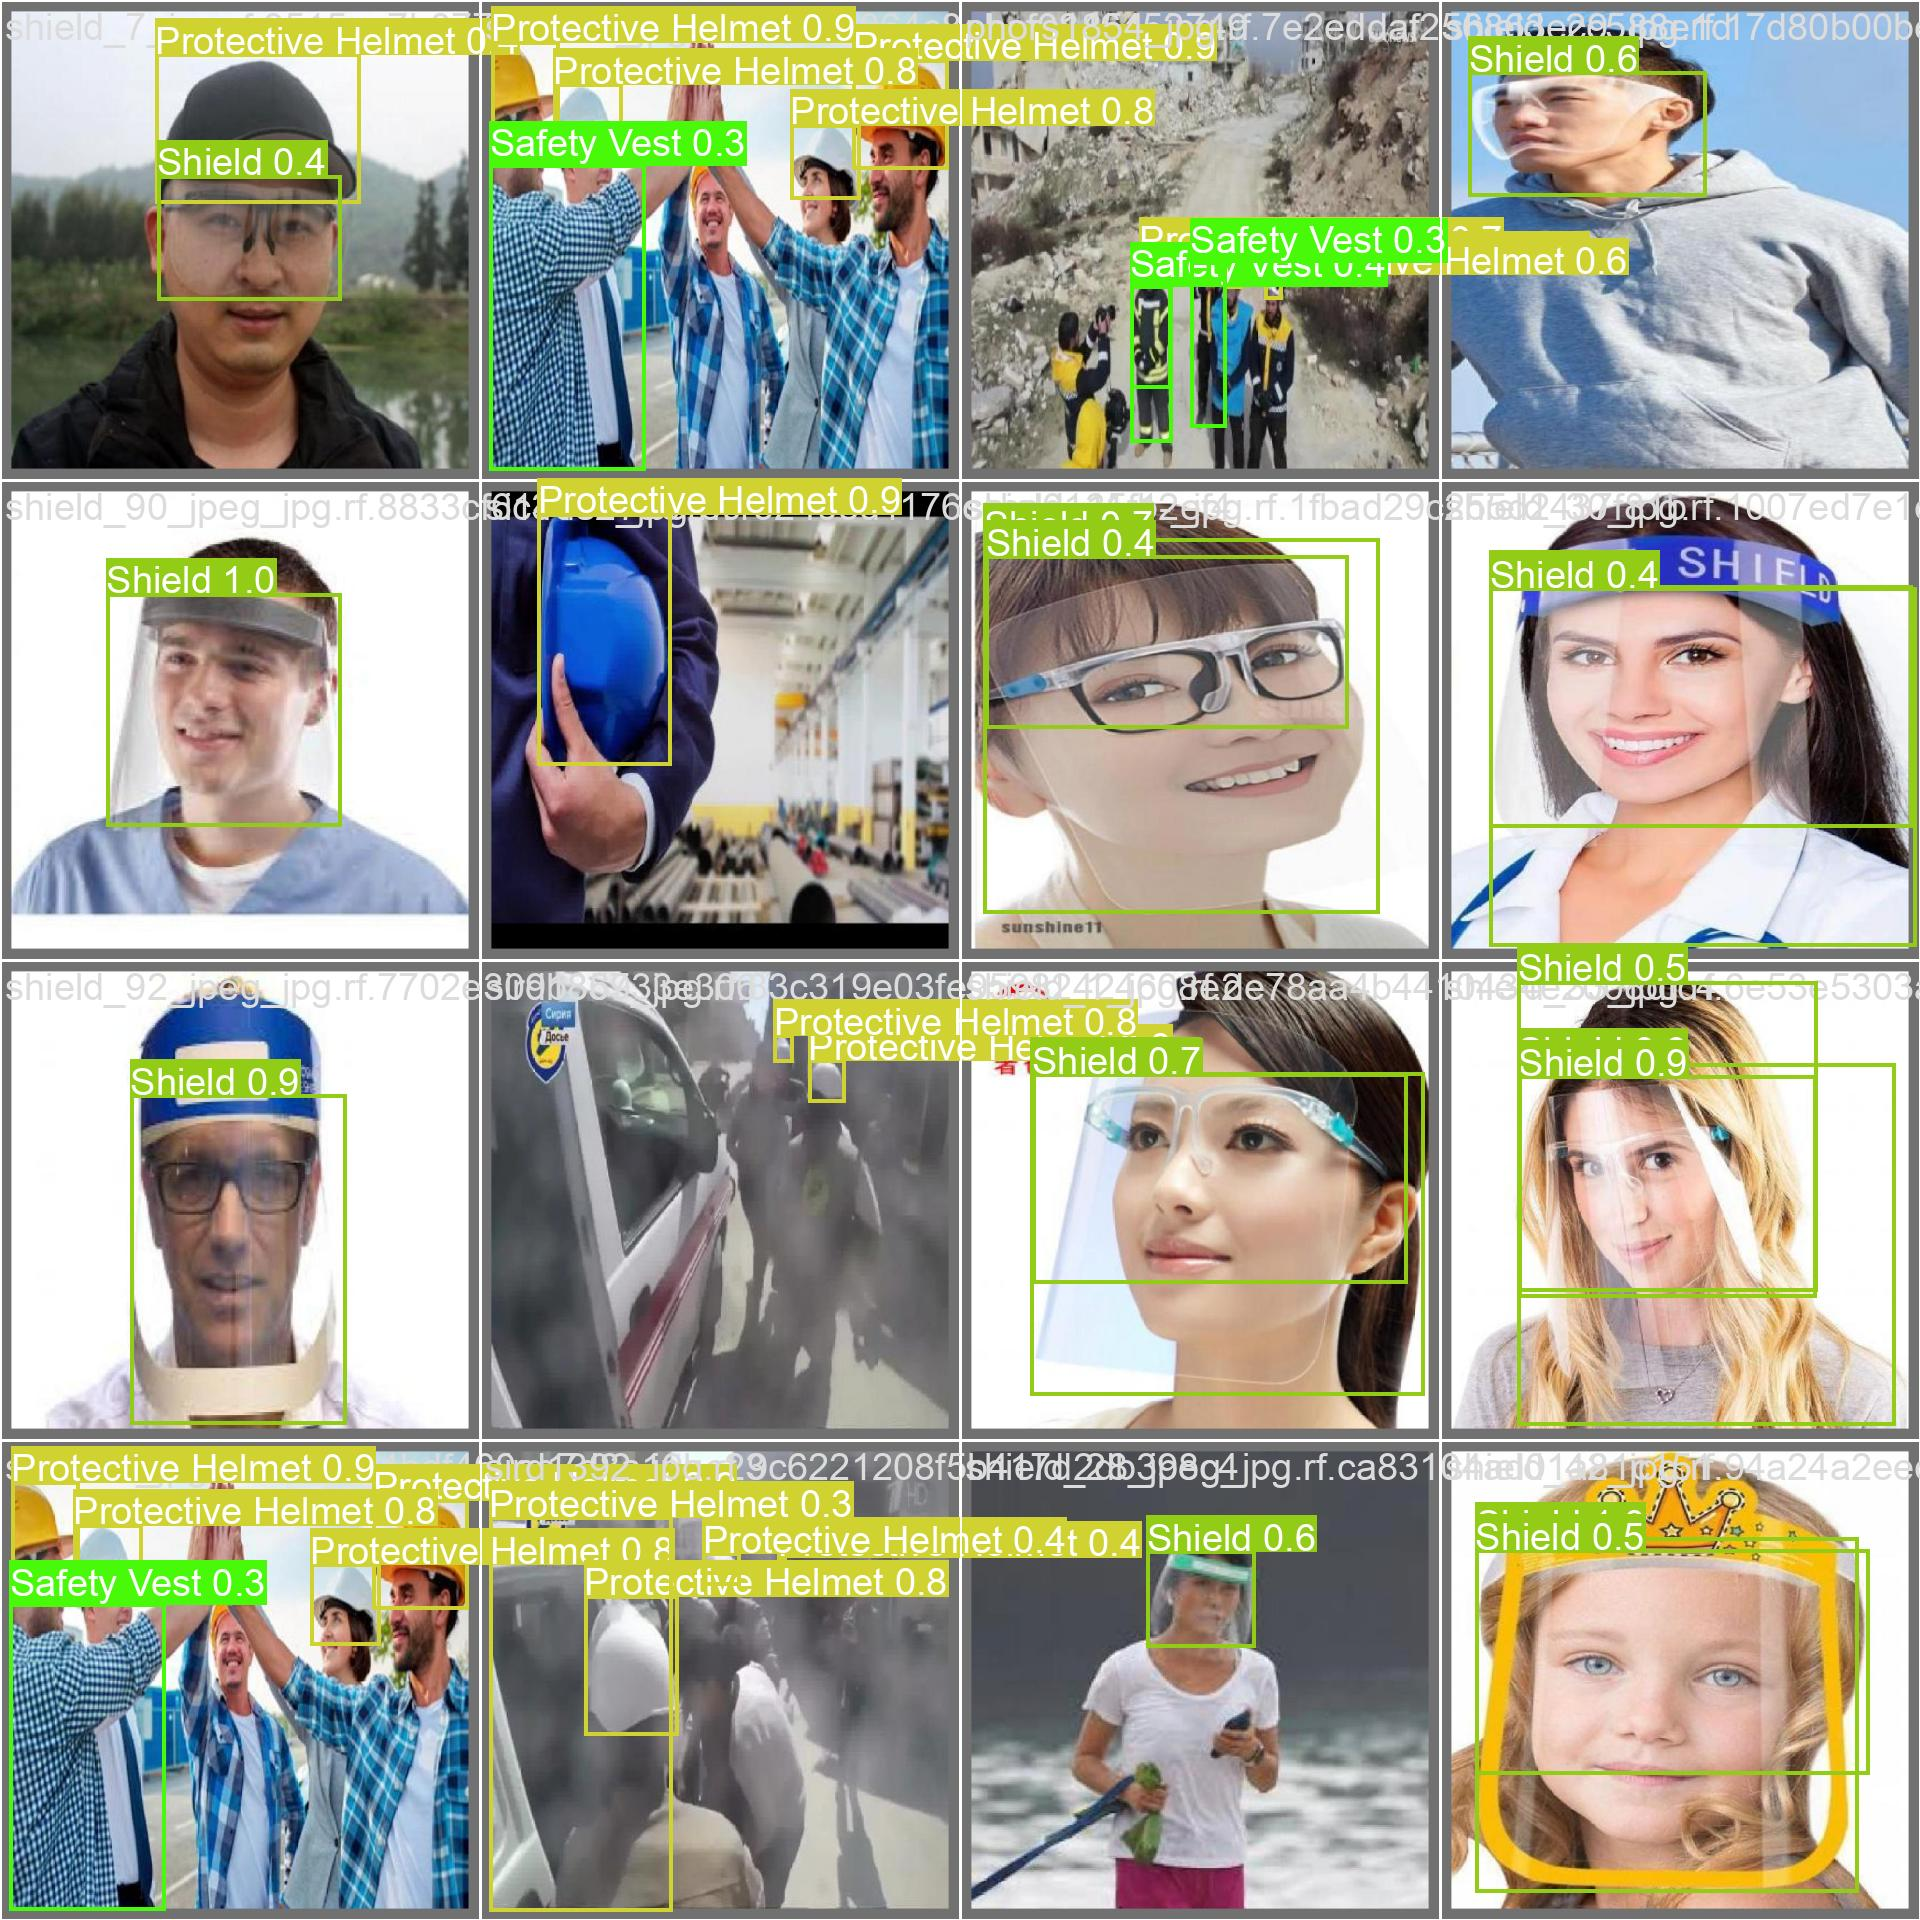

In [ ]:
Image(filename=f"{HOME}/runs/train/yolov9-e-finetuning/val_batch0_pred.jpg", width=600)

In [ ]:
!gdown "https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t
To: /content/yolov9/PPE_Part1.mp4
100% 14.2M/14.2M [00:00<00:00, 16.0MB/s]


In [ ]:
!gdown "https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t
To: /content/yolov9/PPE_Part2.mp4
100% 11.1M/11.1M [00:00<00:00, 16.8MB/s]


In [ ]:
!python detect_dual.py --source '/content/yolov9/PPE_Detection-2/test/images/000446_jpg.rf.63a960737ed4b762294eea1ad1a92791.jpg' --img 640 --device 0 --weights '/content/yolov9/runs/train/yolov9-e-finetuning/weights/best.pt' --name yolov9_c_ppe_640_detect

detect_dual: weights=['/content/yolov9/runs/train/yolov9-e-finetuning/weights/best.pt'], source=/content/yolov9/PPE_Detection-2/test/images/000446_jpg.rf.63a960737ed4b762294eea1ad1a92791.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_c_ppe_640_detect, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
yolov9-e summary: 839 layers, 68557066 parameters, 0 gradients, 240.7 GFLOPs
image 1/1 /content/yolov9/PPE_Detection-2/test/images/000446_jpg.rf.63a960737ed4b762294eea1ad1a92791.jpg: 640x640 1 Dust Mask, 1 Glove, 2 Protective Helmets, 32.4ms
Speed: 0.6ms pre-process, 32.4ms inference, 

In [ ]:
!python detect_dual.py --source '/content/yolov9/PPE_Part1.mp4' --img 640 --device 0 --weights '/content/yolov9/runs/train/yolov9-e-finetuning/weights/best.pt' --name yolov9_c_ppe_640_detect

detect_dual: weights=['/content/yolov9/runs/train/yolov9-e-finetuning/weights/best.pt'], source=/content/yolov9/PPE_Part1.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_c_ppe_640_detect, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
yolov9-e summary: 839 layers, 68557066 parameters, 0 gradients, 240.7 GFLOPs
video 1/1 (1/310) /content/yolov9/PPE_Part1.mp4: 384x640 1 Protective Helmet, 5 Safety Vests, 233.3ms
video 1/1 (2/310) /content/yolov9/PPE_Part1.mp4: 384x640 1 Protective Helmet, 5 Safety Vests, 33.7ms
video 1/1 (3/310) /content/yolov9/PPE_Part1.mp4: 384x640 2 Protective H

In [ ]:
!python detect_dual.py --source '/content/yolov9/PPE_Part2.mp4' --img 640 --device 0 --weights '/content/yolov9/runs/train/yolov9-e-finetuning/weights/best.pt' --name yolov9_c_ppe_640_detect

detect_dual: weights=['/content/yolov9/runs/train/yolov9-e-finetuning/weights/best.pt'], source=/content/yolov9/PPE_Part2.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_c_ppe_640_detect, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
yolov9-e summary: 839 layers, 68557066 parameters, 0 gradients, 240.7 GFLOPs
video 1/1 (1/267) /content/yolov9/PPE_Part2.mp4: 384x640 (no detections), 230.4ms
video 1/1 (2/267) /content/yolov9/PPE_Part2.mp4: 384x640 (no detections), 32.4ms
video 1/1 (3/267) /content/yolov9/PPE_Part2.mp4: 384x640 (no detections), 31.9ms
video 1/1 (4/267) /content/yol

In [22]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/yolov9/runs/detect/yolov9_c_ppe_640_detect4/PPE_Part1.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

In [23]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/yolov9/runs/detect/yolov9_c_ppe_640_detect6/PPE_Part2.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)